# Homework 1


## Data preprocess
Load the monthly returns data on Dell (asset 1) , Boeing (asset 2), and Starbucks (asset 3) for the period
Jan 2019 to Dec 2024 from ’returns_hw.csv’

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression


In [2]:
# Load the dataset
df = pd.read_csv('data/returns_hw.csv')
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           72 non-null     object 
 1   RET_dell       72 non-null     float64
 2   RET_boeing     72 non-null     float64
 3   RET_starbucks  72 non-null     float64
dtypes: float64(3), object(1)
memory usage: 4.6+ KB


,RET_dell,RET_boeing,RET_starbucks
count,72.000000,72.000000,72.000000
mean,0.027651,0.001164,0.009622
std,0.093903,0.133453,0.078702
min,-0.172468,-0.457890,-0.179510
25%,-0.018932,-0.070582,-0.035221
50%,0.022113,-0.007572,0.011791
75%,0.092125,0.065071,0.055740
max,0.225107,0.459312,0.220526


In [3]:
# remove nan values
df = df.dropna()

(a) Plot the returns of three assets in a line figure and comment on any differences.

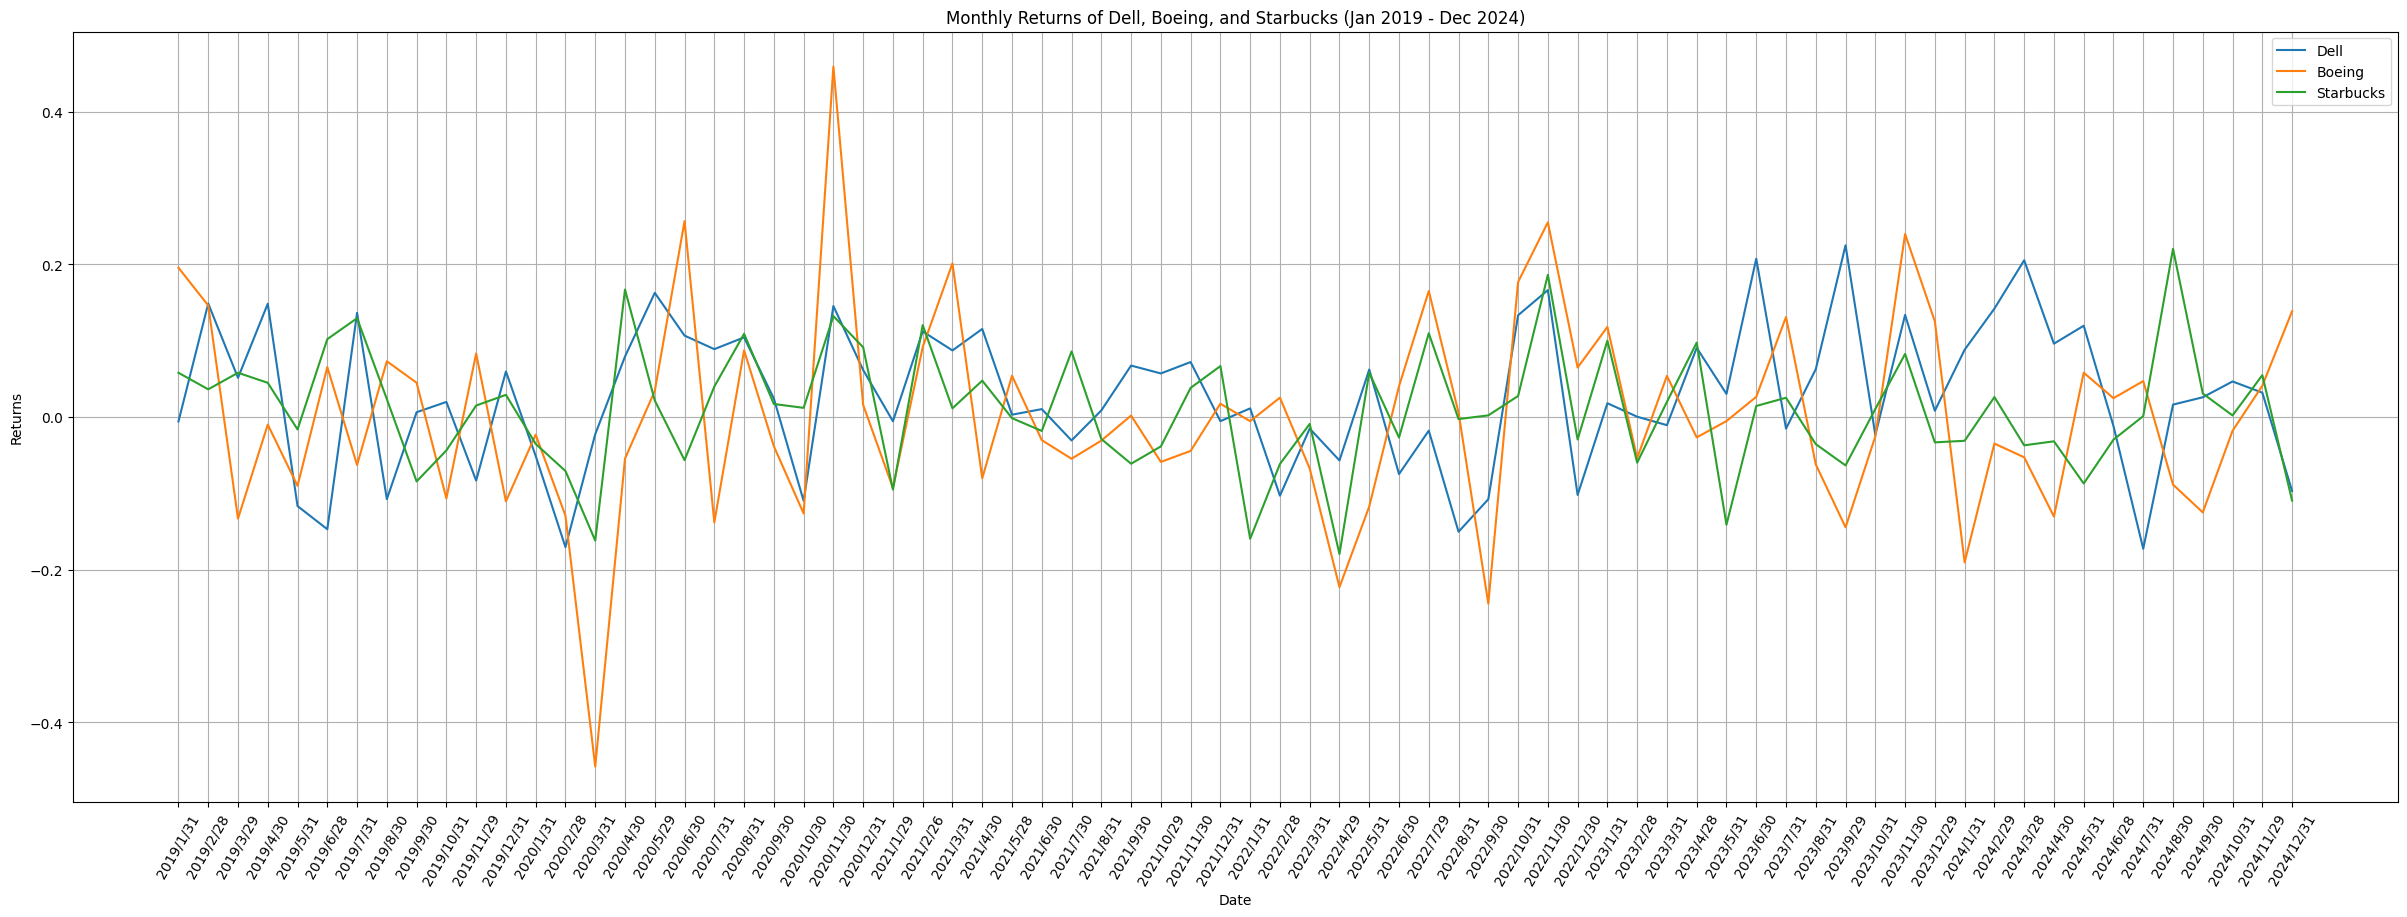

In [4]:
plt.figure(figsize=(30, 10))
plt.plot(df['date'].astype(str), df['RET_dell'], label='Dell')
plt.plot(df['date'].astype(str), df['RET_boeing'], label='Boeing')
plt.plot(df['date'].astype(str), df['RET_starbucks'], label='Starbucks')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.title('Monthly Returns of Dell, Boeing, and Starbucks (Jan 2019 - Dec 2024)')
plt.legend()
plt.grid()
plt.xticks(rotation=60)
plt.show()

(b) Assume that you hold these two stocks in a portfolio. You decide to hold a proportion w1 of your
wealth in Dell and a proportion w2 = 1 − w1 in Boeing in order to minimise the overall risk of the
portfolio. The estimates of optimal portfolio weights are

\begin{aligned}
& \hat{\omega}_1=\frac{\hat{\sigma}_2^2-\hat{\sigma}_{12}}{\hat{\sigma}_1^2+\hat{\sigma}_2^2-2 \hat{\sigma}_{12}} \\
& \hat{\omega}_2=\frac{\hat{\sigma}_1^2-\hat{\sigma}_{12}}{\hat{\sigma}_1^2+\hat{\sigma}_2^2-2 \hat{\sigma}_{12}}
\end{aligned}

In [5]:
# Calculate variances and covariance
sigma1_sq = df['RET_dell'].var()
sigma2_sq = df['RET_boeing'].var()
sigma12 = df[['RET_dell', 'RET_boeing']].cov().iloc[0, 1]
print(sigma1_sq, sigma2_sq, sigma12)




0.008817777522758802 0.017809653720547537 0.002127007360825704


(c1) Based on the equation (1) and (2) and the data given, calculate ŵ1 and ŵ2 .

In [6]:
# proportion w1 of your wealth in Dell\
w1 = (sigma2_sq - sigma12) / (sigma1_sq + sigma2_sq - 2 * sigma12)
# proportion w2 = 1 - w1 in Boeing
w2 = 1 - w1
# cal_w2 = (sigma1_sq - sigma12) / (sigma1_sq + sigma2_sq - 2 * sigma12)
print(f"Optimal weight in Dell (w1): {w1:.4f}")
print(f"Optimal weight in Boeing (w2): {w2:.4f}")
# print(f"Calculated w2: {cal_w2:.4f}")

Optimal weight in Dell (w1): 0.7010
Optimal weight in Boeing (w2): 0.2990


(c2) Also calculate the estimates of the mean $\left(\mu_p\right)$ and the risk $\left(\sigma_p^2\right)$ of the portfolio

$$
\begin{gathered}
\hat{\mu}_p=\hat{\omega}_1 \hat{\mu}_1+\hat{\omega}_2 \hat{\mu}_2 \\
\hat{\sigma}_p^2=\hat{\omega}_1^2 \hat{\sigma}_1^2+\left(1-\hat{\omega}_1\right)^2 \hat{\sigma}_2^2+2 \hat{\omega}_1\left(1-\hat{\omega}_1\right) \hat{\sigma}_{12}
\end{gathered}
$$

In [7]:
mu_1 = df['RET_dell'].mean()
mu_2 = df['RET_boeing'].mean()
mu_p = w1 * mu_1 + w2 * mu_2
sigma_p_sq = (w1 ** 2) * sigma1_sq + (w2 ** 2) * sigma2_sq + 2 * w1 * w2 * sigma12

(c3) Compare the estimated variance of the portfolio with the sample variances of both stocks and
comment the results.

In [8]:
print(f"Estimated variance of the portfolio (sigma_p^2): {sigma_p_sq:.4f}")
print(f"Estimated variance of Dell Stock (sigma_1^2): {sigma1_sq:.4f}")
print(f"Estimated variance of Boeing Stock (sigma_2^2): {sigma2_sq:.4f}")

#The variance of the portfolio is less than the variance of each individual stock

Estimated variance of the portfolio (sigma_p^2): 0.0068
Estimated variance of Dell Stock (sigma_1^2): 0.0088
Estimated variance of Boeing Stock (sigma_2^2): 0.0178


(d) Set up a linear regression model and estimate w1 ,w2 and µ p by your regression, report the OLS
results and comment your results.

In [ ]:
y = df['RET_dell'] # dependent variable
x = df['RET_dell'] - df['RET_boeing'] # independent variable
# print(x, y)

# Fit linear regression model
x = sm.add_constant(x)  # add constant term for intercept
# print(x)

x.columns = ['const', 'RET_diff']
model = sm.OLS(y, x).fit()

# Print the regression results
print(model.summary())

# from the result the model mu_p is 0.0197, w2 is 0.2990, w1 is 0.7010



                            OLS Regression Results                            
Dep. Variable:               RET_dell   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     20.55
Date:                Wed, 29 Oct 2025   Prob (F-statistic):           2.34e-05
Time:                        00:23:56   Log-Likelihood:                 77.921
No. Observations:                  72   AIC:                            -151.8
Df Residuals:                      70   BIC:                            -147.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0197      0.010      1.982      0.0

(e) Now, suppose that you want to construct a minimum variance portfolio with these three stocks. How
would you estimate the weights? Please set up a regression model to estimate the weights, report the
OLS results and comment your results.

In [14]:
r1 = df['RET_dell']
r2 = df['RET_boeing']
r3 = df['RET_starbucks']
Y = r1
X1 = r1 - r2
X2 = r1 - r3
X = pd.DataFrame({'RET_dell - RET_boeing': X1, 'RET_dell - RET_starbucks': X2})
X = sm.add_constant(X)  # add constant term for intercept
model2 = sm.OLS(Y, X).fit()
print(model2.summary())

# from the result the model mu_p is 0.0154, w2 is 0.0900, w3 is 0.5484, w1 is 0.3616

                            OLS Regression Results                            
Dep. Variable:               RET_dell   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     34.45
Date:                Wed, 29 Oct 2025   Prob (F-statistic):           4.22e-11
Time:                        00:23:13   Log-Likelihood:                 93.582
No. Observations:                  72   AIC:                            -181.2
Df Residuals:                      69   BIC:                            -174.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   